# Dealing with variants example

In [1]:
import sys
import os
# Get the current directory (where the notebook is located)
notebook_dir = os.getcwd()
# Get the parent directory
parent_dir = os.path.abspath(os.path.join(notebook_dir, os.pardir))
# Get two directories up
two_dirs_up = os.path.abspath(os.path.join(parent_dir, os.pardir))
# Add the project directory to the Python path
sys.path.append(two_dirs_up)

In [2]:
import warnings
warnings.filterwarnings('ignore', category=RuntimeWarning)
warnings.filterwarnings('ignore', category=UserWarning)

In [3]:
import sax
from sax.process_data.formatters.xes_formatter import XESFormatter
from sax.process_data.formatters.csv_formatter import CSVFormatter
from sax.utils.constants import Constants
from lingam.utils import make_dot
from sax.process_data.tabular_data import TabularEventData
import pm4py
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
import sax.process_mining.process_mining as pm
# viz
from pm4py.visualization.petri_net import visualizer as pn_visualizer
from pm4py.visualization.process_tree import visualizer as pt_visualizer
from pm4py.visualization.heuristics_net import visualizer as hn_visualizer
from pm4py.visualization.dfg import visualizer as dfg_visualization
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.objects.log.importer.xes import importer as xes_importer

# misc 
from pm4py.objects.conversion.process_tree import converter as pt_converter

In [4]:
fileName = "C:\Data\Automation\SAX\Papers\ICPM 2023\Possible datasets\RequestPaymentRejectedAndPayment.xes"
dataframe = pm.import_xes(fileName,timestamp_format="%Y-%m-%d %H:%M:%S.%f")

c:\Data\Automation\SAX\sax4bpm\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
parsing log, completed traces :: 100%|██████████| 378/378 [00:00<00:00, 2307.82it/s]


In [5]:
dataframe.getData()

,org:resource,lifecycle:transition,concept:name,org:role,time:timestamp,case:concept:name
0,STAFF MEMBER,start,Request For Payment REJECTED by ADMINISTRATION,ADMINISTRATION,2018-06-05 07:58:32+00:00,request for payment 168547
1,STAFF MEMBER,complete,Request For Payment REJECTED by ADMINISTRATION,ADMINISTRATION,2018-06-05 07:58:32+00:00,request for payment 168547
2,STAFF MEMBER,start,Request For Payment REJECTED by EMPLOYEE,EMPLOYEE,2018-06-05 08:39:52+00:00,request for payment 168547
3,STAFF MEMBER,complete,Request For Payment REJECTED by EMPLOYEE,EMPLOYEE,2018-06-05 08:39:52+00:00,request for payment 168547
4,STAFF MEMBER,start,Request For Payment SUBMITTED by EMPLOYEE,EMPLOYEE,2018-06-05 15:02:39+00:00,request for payment 168547
...,...,...,...,...,...,...
5577,STAFF MEMBER,complete,Request For Payment FINAL_APPROVED by SUPERVISOR,SUPERVISOR,2018-03-27 04:47:03+00:00,request for payment 157391
5578,SYSTEM,start,Request Payment,UNDEFINED,2018-03-27 06:59:14+00:00,request for payment 157391
5579,SYSTEM,complete,Request Payment,UNDEFINED,2018-03-27 06:59:14+00:00,request for payment 157391
5580,SYSTEM,start,Payment Handled,UNDEFINED,2018-03-29 15:31:11+00:00,request for payment 157391


In [6]:
print('Mandatory Properties of the parsed event log: \n',dataframe.getMandatoryProperties())
print('Optional properties of the parsed event log: \n',dataframe.getOptionalProperties())


Mandatory Properties of the parsed event log: 
 {'case:concept:name': 'case:concept:name', 'concept:name': 'concept:name', 'time:timestamp': 'time:timestamp', 'lifecycle:transition': 'lifecycle:transition'}
Optional properties of the parsed event log: 
 {'org:resource': 'org:resource', 'org:role': 'org:role'}


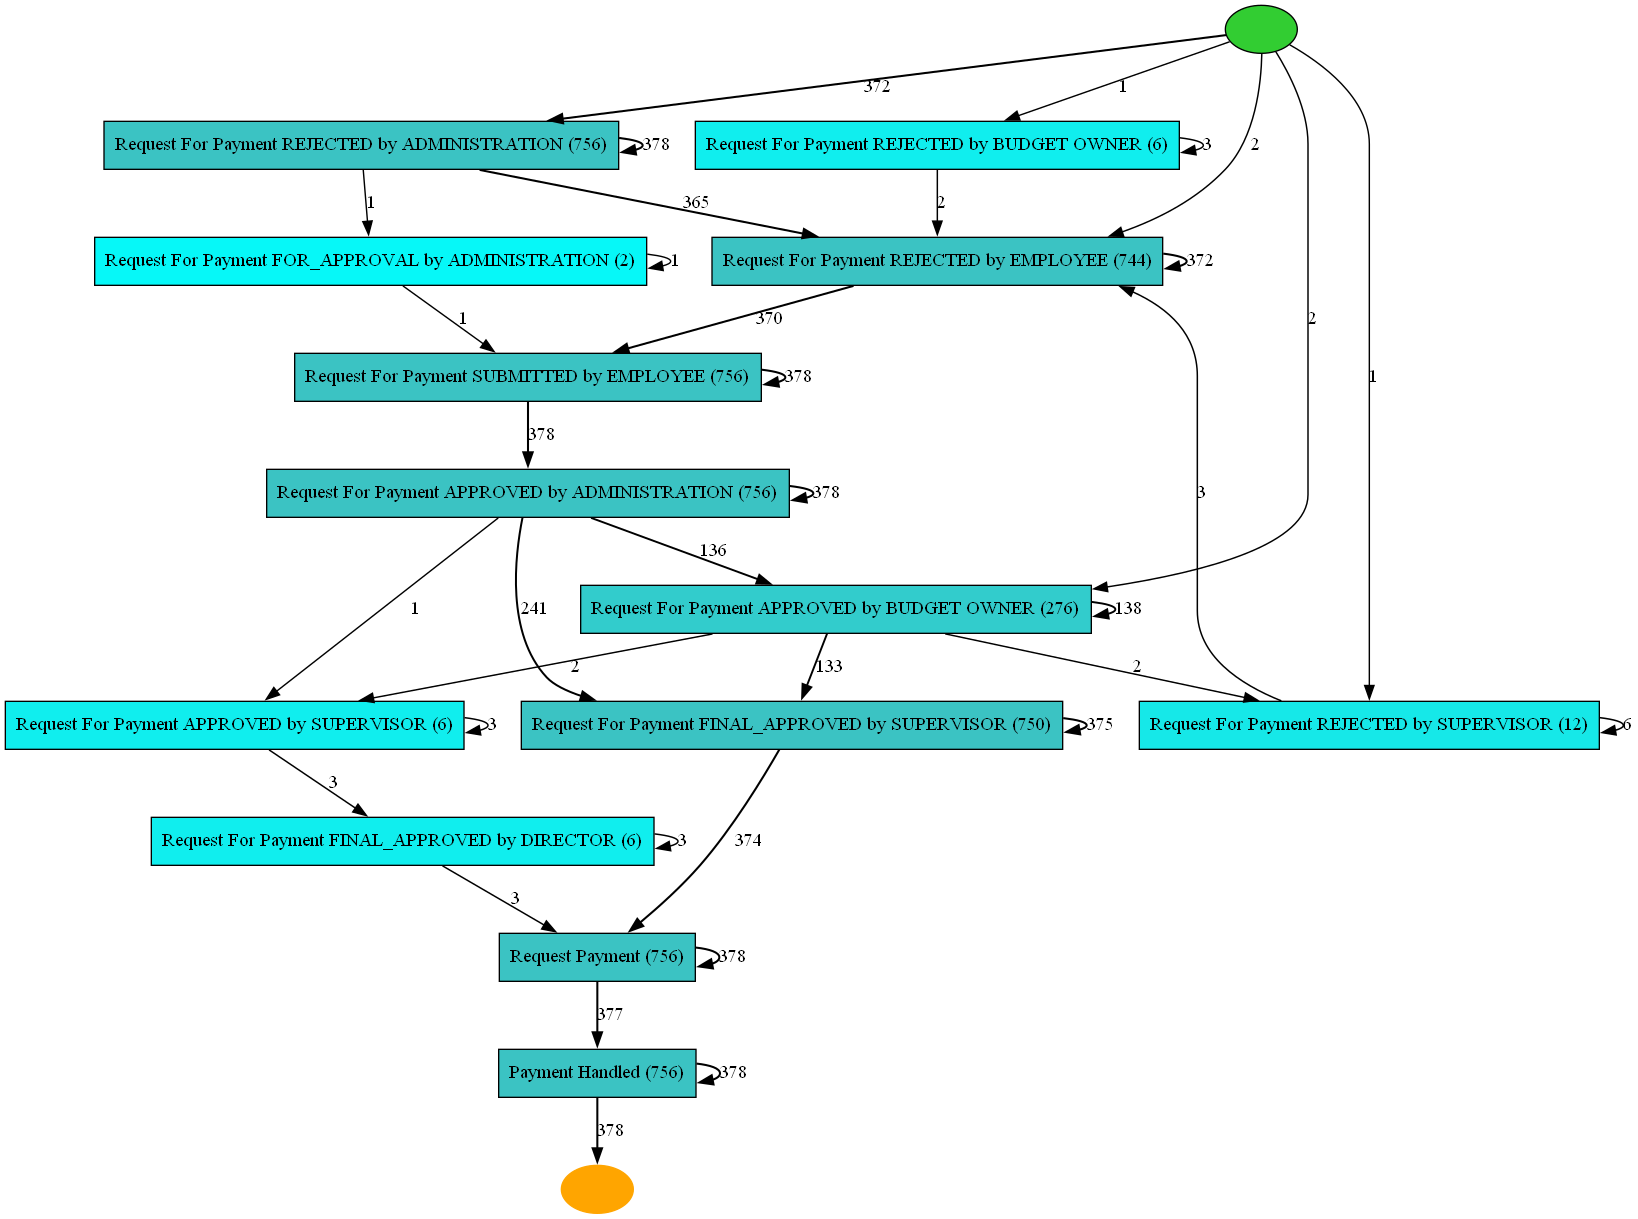

In [7]:
net = pm.discover_heuristics_net(dataframe)
pm.view_heuristics_net(net)

In [8]:
activities_data = dataframe.getMandatoryPropertiesData()

In [9]:
activities_data

,lifecycle:transition,concept:name,time:timestamp,case:concept:name
0,start,Request For Payment REJECTED by ADMINISTRATION,2018-06-05 07:58:32+00:00,request for payment 168547
1,complete,Request For Payment REJECTED by ADMINISTRATION,2018-06-05 07:58:32+00:00,request for payment 168547
2,start,Request For Payment REJECTED by EMPLOYEE,2018-06-05 08:39:52+00:00,request for payment 168547
3,complete,Request For Payment REJECTED by EMPLOYEE,2018-06-05 08:39:52+00:00,request for payment 168547
4,start,Request For Payment SUBMITTED by EMPLOYEE,2018-06-05 15:02:39+00:00,request for payment 168547
...,...,...,...,...
5577,complete,Request For Payment FINAL_APPROVED by SUPERVISOR,2018-03-27 04:47:03+00:00,request for payment 157391
5578,start,Request Payment,2018-03-27 06:59:14+00:00,request for payment 157391
5579,complete,Request Payment,2018-03-27 06:59:14+00:00,request for payment 157391
5580,start,Payment Handled,2018-03-29 15:31:11+00:00,request for payment 157391


In [10]:
dataframe.getVariants()

{'Request For Payment REJECTED by ADMINISTRATION,Request For Payment REJECTED by EMPLOYEE,Request For Payment SUBMITTED by EMPLOYEE,Request For Payment APPROVED by ADMINISTRATION,Request For Payment FINAL_APPROVED by SUPERVISOR,Request Payment,Payment Handled,': 233,
 'Request For Payment REJECTED by ADMINISTRATION,Request For Payment REJECTED by EMPLOYEE,Request For Payment SUBMITTED by EMPLOYEE,Request For Payment APPROVED by ADMINISTRATION,Request For Payment APPROVED by BUDGET OWNER,Request For Payment FINAL_APPROVED by SUPERVISOR,Request Payment,Payment Handled,': 126,
 'Request For Payment REJECTED by EMPLOYEE,Request For Payment REJECTED by ADMINISTRATION,Request For Payment FOR_APPROVAL by ADMINISTRATION,Request For Payment SUBMITTED by EMPLOYEE,Request For Payment APPROVED by ADMINISTRATION,Request For Payment APPROVED by BUDGET OWNER,Request For Payment FINAL_APPROVED by SUPERVISOR,Request Payment,Payment Handled,': 1,
 'Request For Payment REJECTED by ADMINISTRATION,Request 

In [11]:
variant = dataframe.getVariant('Request For Payment REJECTED by ADMINISTRATION,Request For Payment REJECTED by EMPLOYEE,Request For Payment SUBMITTED by EMPLOYEE,Request For Payment APPROVED by ADMINISTRATION,Request For Payment APPROVED by BUDGET OWNER,Request For Payment FINAL_APPROVED by SUPERVISOR,Request Payment,Payment Handled,')
variant.getData()

,org:resource,lifecycle:transition,concept:name,org:role,time:timestamp,case:concept:name
14,STAFF MEMBER,start,Request For Payment REJECTED by ADMINISTRATION,ADMINISTRATION,2018-12-09 11:02:25+00:00,request for payment 177678
15,STAFF MEMBER,complete,Request For Payment REJECTED by ADMINISTRATION,ADMINISTRATION,2018-12-09 11:02:25+00:00,request for payment 177678
16,STAFF MEMBER,start,Request For Payment REJECTED by EMPLOYEE,EMPLOYEE,2018-12-10 15:14:41+00:00,request for payment 177678
17,STAFF MEMBER,complete,Request For Payment REJECTED by EMPLOYEE,EMPLOYEE,2018-12-10 15:14:41+00:00,request for payment 177678
18,STAFF MEMBER,start,Request For Payment SUBMITTED by EMPLOYEE,EMPLOYEE,2018-12-12 10:16:29+00:00,request for payment 177678
...,...,...,...,...,...,...
5577,STAFF MEMBER,complete,Request For Payment FINAL_APPROVED by SUPERVISOR,SUPERVISOR,2018-03-27 04:47:03+00:00,request for payment 157391
5578,SYSTEM,start,Request Payment,UNDEFINED,2018-03-27 06:59:14+00:00,request for payment 157391
5579,SYSTEM,complete,Request Payment,UNDEFINED,2018-03-27 06:59:14+00:00,request for payment 157391
5580,SYSTEM,start,Payment Handled,UNDEFINED,2018-03-29 15:31:11+00:00,request for payment 157391


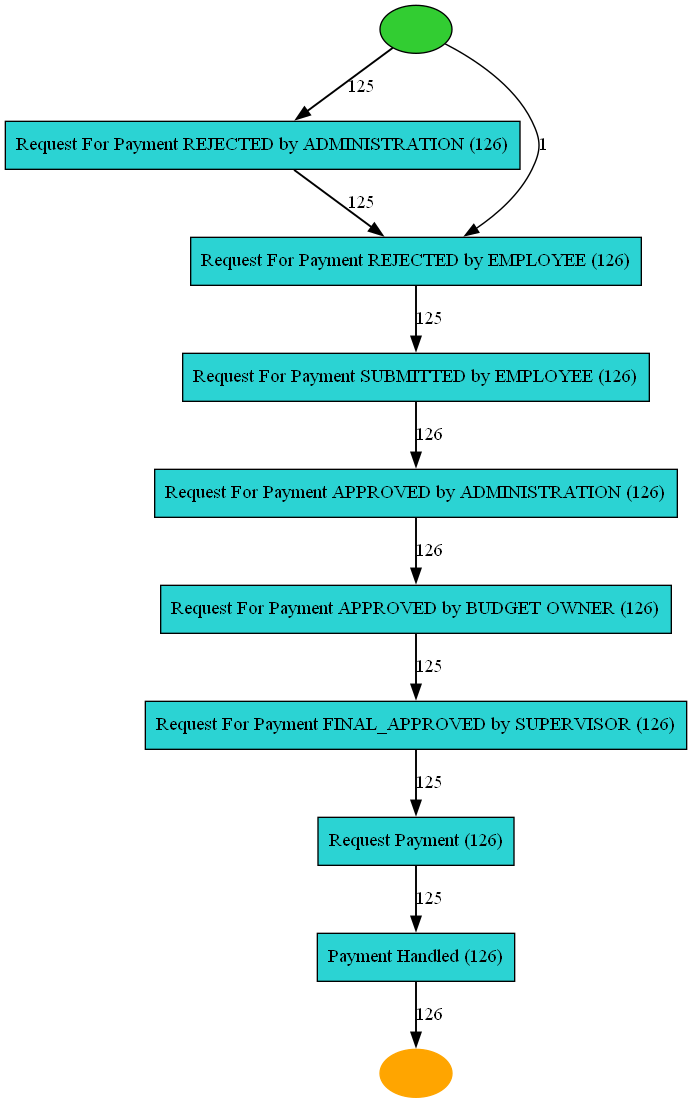

In [12]:
from sax.utils.constants import LifecycleTypes


net = pm.discover_heuristics_net(variant,[LifecycleTypes.COMPLETE.value])
pm.view_heuristics_net(net)

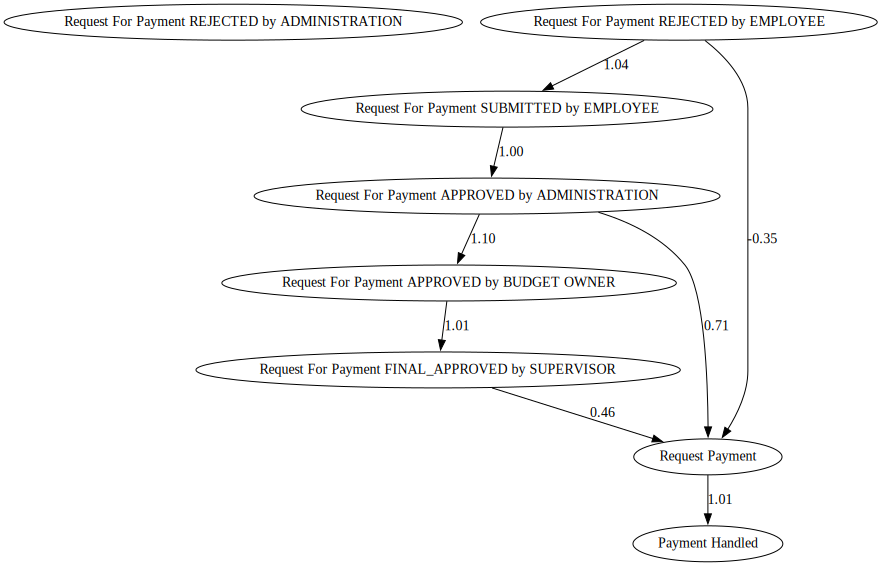

In [13]:
import sax.causal_process_discovery.causal_discovery as cd
result = cd.discover_causal_dependencies(variant)
cd.view_causal_dependencies(result)
